<a href="https://colab.research.google.com/github/Barbara-BB/FatecAPI-06/blob/main/EDA_Open_Finance.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <center>**EDA - Open Finance**

###<center>**Categorias**

#### Esta é uma análise EDA (Exploratory Data Analysis) das categorias de bancos registrados no Open Finance, base acessível pelo link [Open Finance bcb](https://olinda.bcb.gov.br/olinda/servico/Informes_ListaTarifaPorValores/versao/v1/aplicacao#!/recursos/GruposConsolidados#eyJmb3JtdWxhcmlvIjp7IiRmb3JtYXQiOiJqc29uIiwiJHRvcCI6MTAwfX0=)

Os dados foram tratados e corrigidos para gerar o dataset utilizado abaixo

### Importando bibliotecas necessárias para análise



In [ ]:
import pandas as pd
import seaborn as sns

###Lendo o dataset de categorias de bancos

In [ ]:
bancos_categoria=pd.read_csv("/content/drive/MyDrive/EDA/ListaInstituicoesDeGrupoConsolidadoTipoBanco10_05.csv", sep=',', encoding='latin-1')
bancos_categoria.head

<bound method NDFrame.head of                                               TipoBanco      Cnpj  \
0                                       Bancos privados   2801938   
1                                       Bancos privados  42272526   
2                                       Bancos privados  60498557   
3                                       Bancos privados  10690848   
4                                       Bancos privados  60746948   
...                                                 ...       ...   
1453                       Sociedades Distribuidoras...   4257795   
1454                       Sociedades Distribuidoras...  33923111   
1455                       Sociedades Distribuidoras...   2685483   
1456  Associações de poupança e empréstimos e socied...  87091716   
1457  Associações de poupança e empréstimos e socied...    655522   

                                                   Nome  
0                             BANCO MORGAN STANLEY S.A.  
1                        

### Organizando as colunas do dataframe

In [ ]:
bancos_categoria.columns=["Categoria","CNPJ","Nome"]

In [ ]:
bancos_categoria.head()

,Categoria,CNPJ,Nome
0,Bancos privados,2801938,BANCO MORGAN STANLEY S.A.
1,Bancos privados,42272526,BNY MELLON BANCO S.A.
2,Bancos privados,60498557,BANCO MUFG BRASIL S.A.
3,Bancos privados,10690848,BANCO DA CHINA BRASIL S.A.
4,Bancos privados,60746948,BANCO BRADESCO S.A.


In [ ]:
bancos_categoria['Categoria'].unique

<bound method Series.unique of 0                                         Bancos privados
1                                         Bancos privados
2                                         Bancos privados
3                                         Bancos privados
4                                         Bancos privados
                              ...                        
1453                         Sociedades Distribuidoras...
1454                         Sociedades Distribuidoras...
1455                         Sociedades Distribuidoras...
1456    Associações de poupança e empréstimos e socied...
1457    Associações de poupança e empréstimos e socied...
Name: Categoria, Length: 1458, dtype: object>

### Contando quantidade por categoria

In [ ]:
bancos_categoria['Categoria'].value_counts()

Cooperativas de Credito                                                      819
Sociedades Distribuidoras...                                                 223
Sociedades de Crédito e Financiamento e Investimento (CFI)                   202
Bancos privados                                                              151
Agencias de Fomento e Companhias Hipotecaria                                  21
Sociedades de Arrendamento Mercantil                                          17
Bancos de Desenvolvimento e Investimento                                      14
Bancos públicos + Caixa Econômica Federal                                      9
Associações de poupança e empréstimos e sociedades de crédito Imobiliário      2
Name: Categoria, dtype: int64

In [ ]:
contagem_de_categoria=bancos_categoria.Categoria.value_counts().to_frame().reset_index()
contagem_de_categoria.columns=["categoria","total"]
contagem_de_categoria.head()

,categoria,total
0,Cooperativas de Credito,819
1,Sociedades Distribuidoras...,223
2,Sociedades de Crédito e Financiamento e Invest...,202
3,Bancos privados,151
4,Agencias de Fomento e Companhias Hipotecaria,21


### Importando biblioteca

In [ ]:
from matplotlib import pyplot as plt

### Gerando gráfico de quantidade de bancos por categorias do Open Finance
Percebe-se que há uma grande quantidade de cooperativas de crédito

<Axes: xlabel='total', ylabel='categoria'>

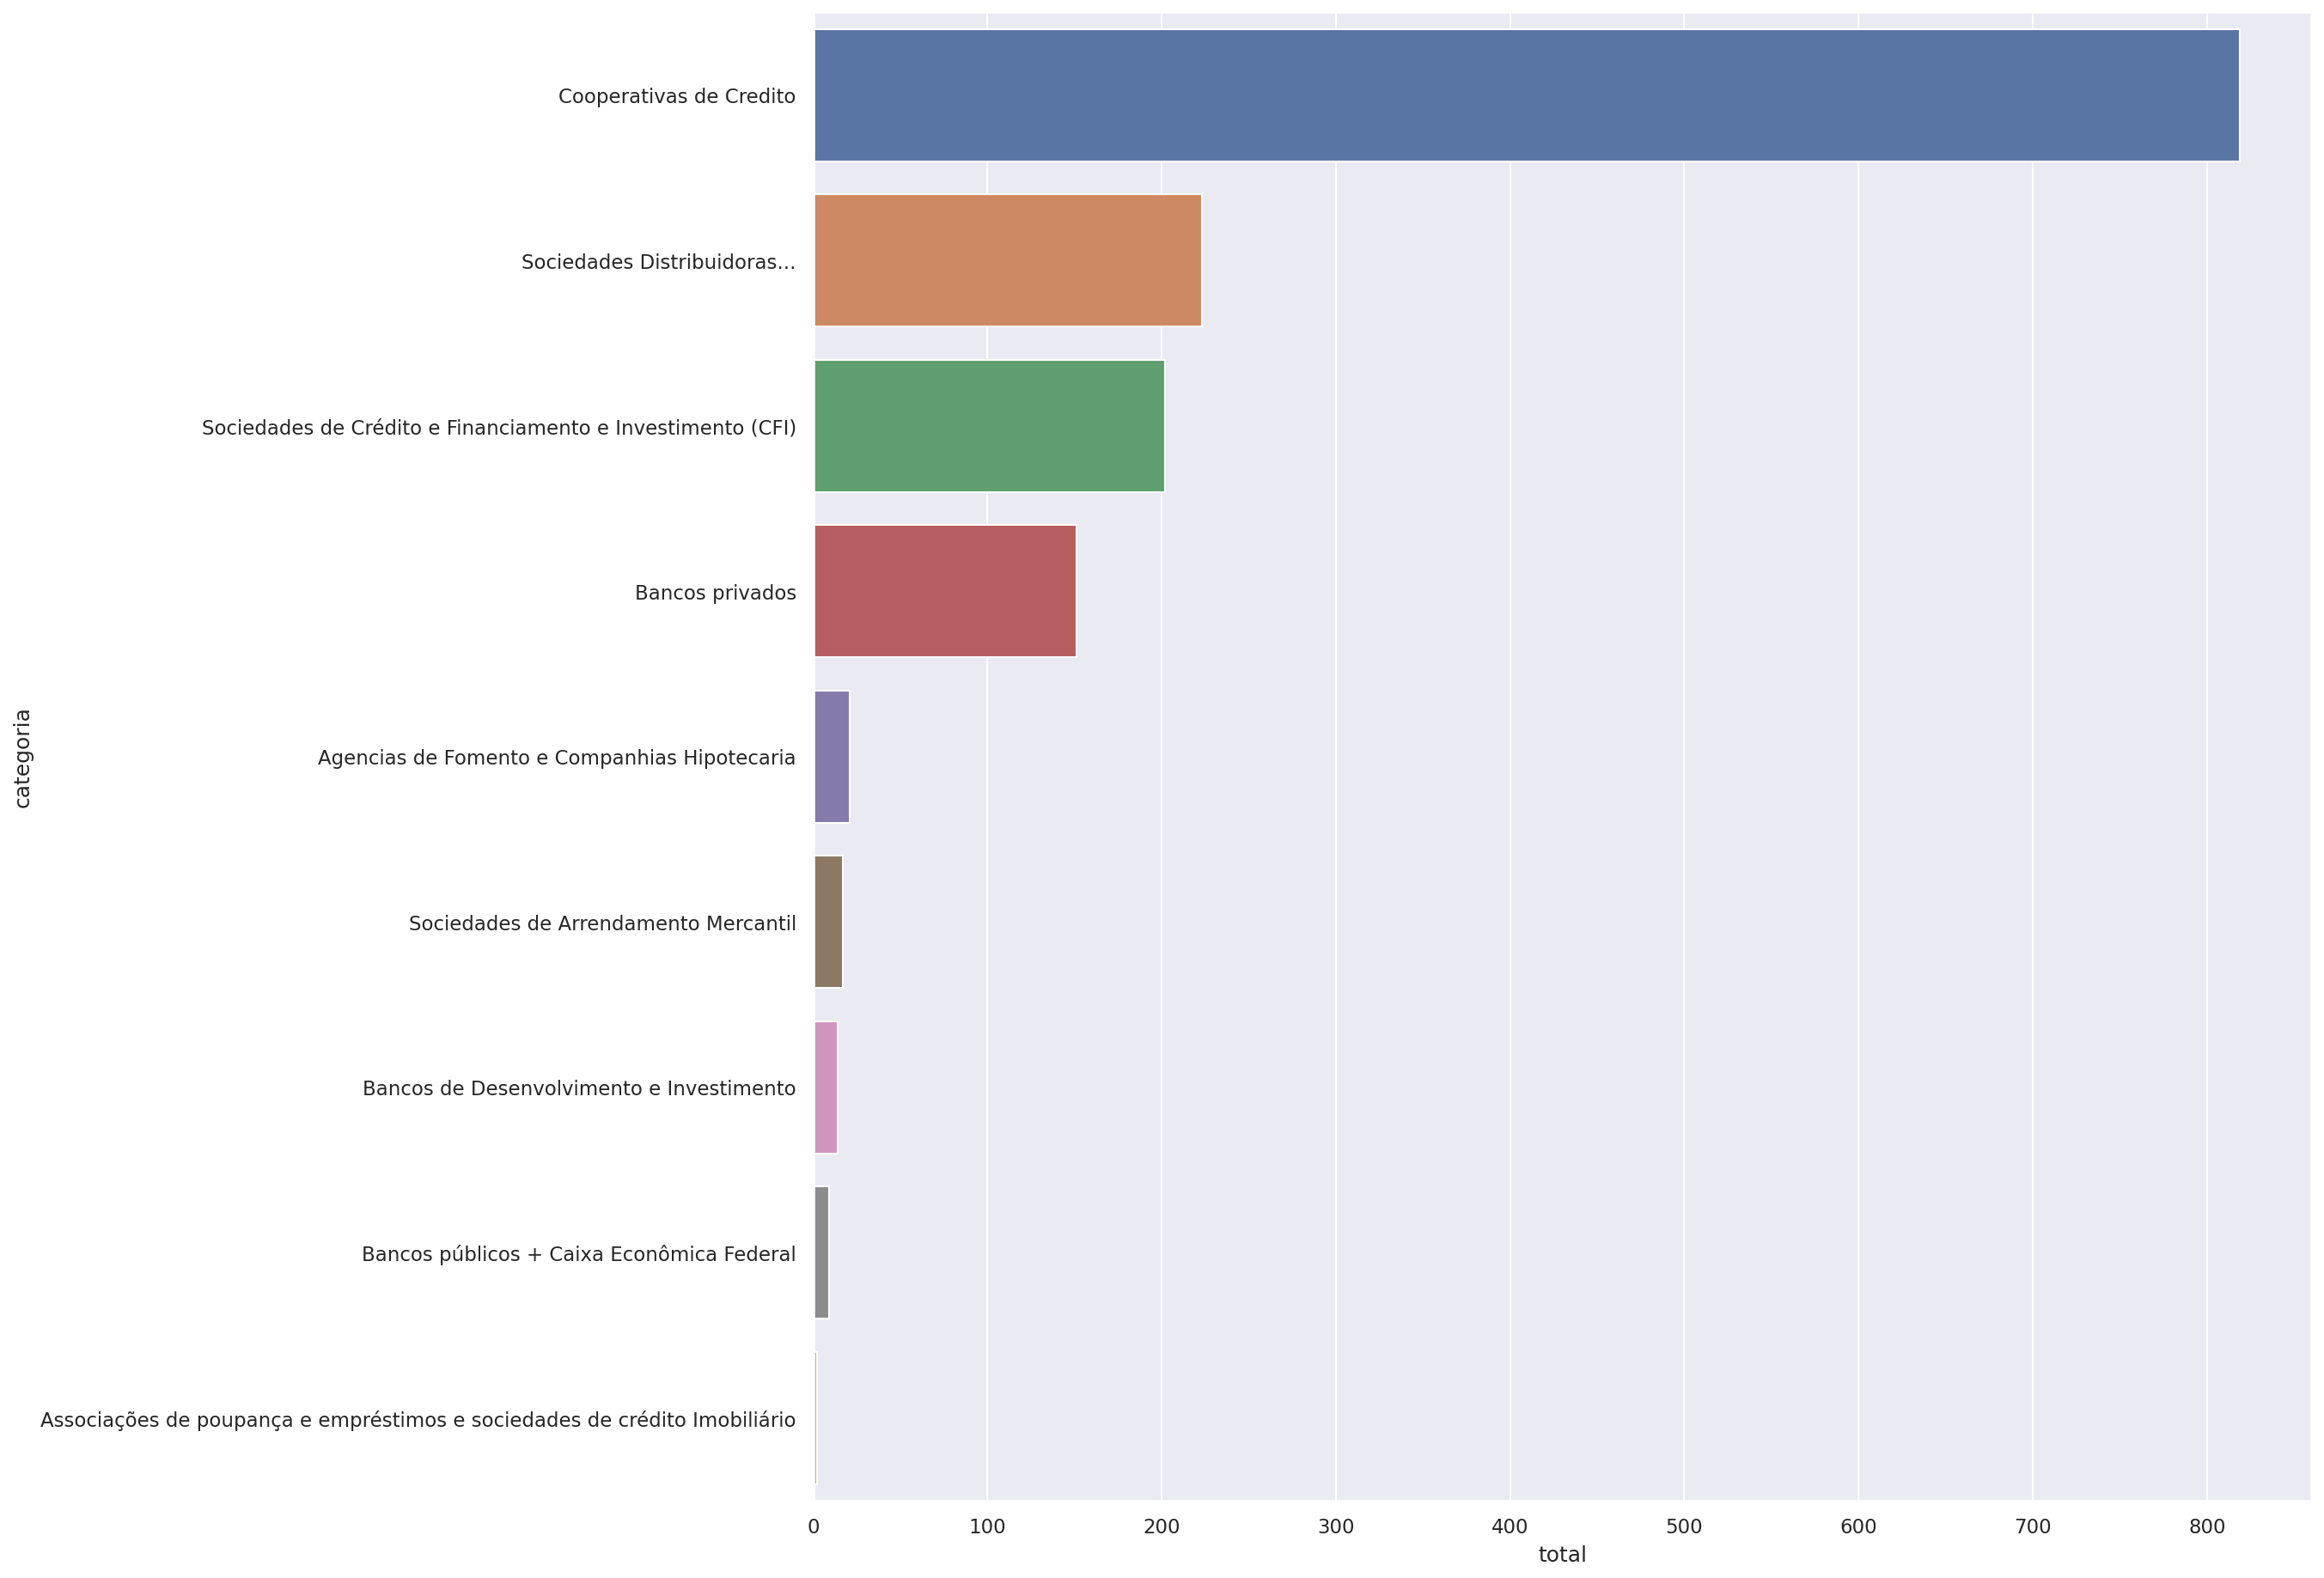

In [ ]:
sns.set()
plt.figure(figsize = (15,15), dpi=150)
sns.barplot(x="total", y="categoria",data=contagem_de_categoria)

### Realizando calculos para poder comparar cooperativas de crédito com o total de outras categorias

In [ ]:
total_por_categoria=bancos_categoria["Categoria"].value_counts()
total_geral=total_por_categoria.sum()
total_de_cooperativas=total_por_categoria.loc["Cooperativas de Credito"]
total_do_resto=total_geral - total_de_cooperativas
print(total_de_cooperativas,total_do_resto)

819 639


In [ ]:
dados = {
    'categoria':['Cooperativas de Credito' ,'outros'],
    'total' : [total_de_cooperativas, total_do_resto]}
dados=pd.DataFrame(dados)
dados

,categoria,total
0,Cooperativas de Credito,819
1,outros,639


O gráfico evidencia que a quantidade de cooperativas de crédito é maior que o total de bancos existentes em outras categorias

<Axes: xlabel='categoria', ylabel='total'>

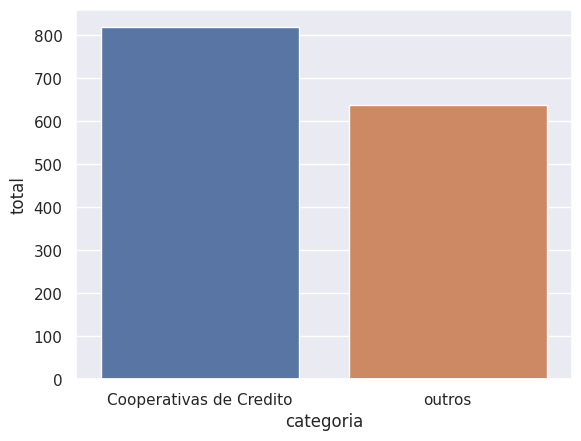

In [ ]:
sns.barplot(x="categoria", y="total", data=dados)

### Realizando cálculos para analisar outras categorias, desconsiderando cooperativas de crédito

In [ ]:
total_por_categoria_de_outros=bancos_categoria.query("Categoria != 'Cooperativas de Credito'").Categoria.value_counts()
total_por_categoria_de_outros

Sociedades Distribuidoras...                                                 223
Sociedades de Crédito e Financiamento e Investimento (CFI)                   202
Bancos privados                                                              151
Agencias de Fomento e Companhias Hipotecaria                                  21
Sociedades de Arrendamento Mercantil                                          17
Bancos de Desenvolvimento e Investimento                                      14
Bancos públicos + Caixa Econômica Federal                                      9
Associações de poupança e empréstimos e sociedades de crédito Imobiliário      2
Name: Categoria, dtype: int64

Fica evidente que sociedades estão em maior número

Bancos privados estão após as sociedades

Bancos públicos que são muito conhecidos pela sociedade estão em menor número de forma discrepante

<Figure size 2250x30000 with 0 Axes>

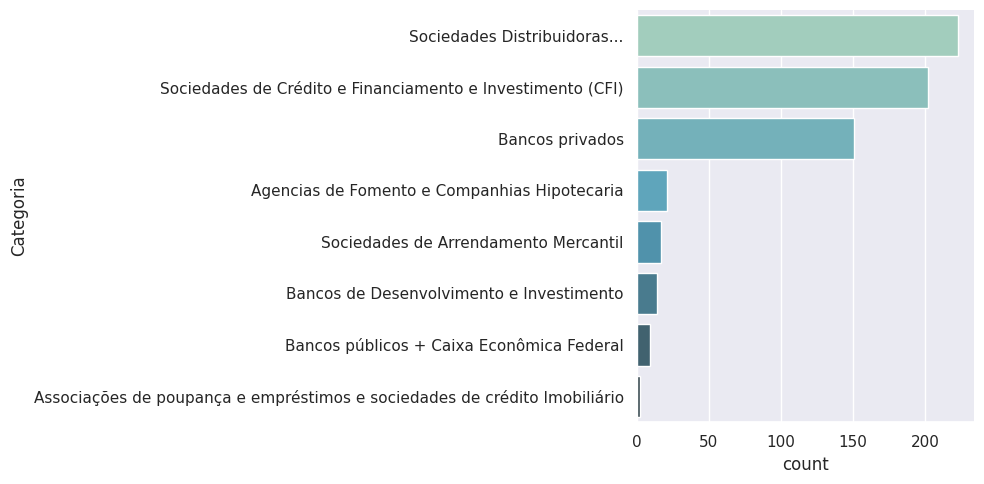

In [ ]:
categoria_sem_cooperativa = bancos_categoria.query("Categoria != 'Cooperativas de Credito'")
plt.figure(figsize = (15,200), dpi=150)
sns.catplot(kind="count",y="Categoria" , 
            data=categoria_sem_cooperativa,aspect=2,
            palette="GnBu_d",
            order=total_por_categoria_de_outros.index)

### Conclui-se que bancos como cooperativas e sociedades estão em maior número que bancos privados e se comparados aos bancos públicos, a diferença na proporção é surpreedente.

### A curiosidade que fica é se há tantas cooperativas e sociedades, isso siginifica que elas oferecem menor tarifas e taxas?